****<span style="color:red">Making Sense of the Titanic Survival Data with a Decision Tree</span>****

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

**Using Dataset downloaded from Kaggle**

In [86]:
titn=pd.read_csv("titanic.csv")
titn[titn.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


**Preprocessing 1 : Filling NaN in Age with Different Approach**

*<span style="color:brown">1-With Median of Age of Different Group Based On Survival and Sex</span>*

In [87]:
male_survived_age_median = titn.loc[(titn['Sex'] == 'male') & (titn['Survived'] == 1), 'Age'].median()
male_death_age_median = titn.loc[(titn['Sex'] == 'male') & (titn['Survived'] == 0), 'Age'].median()
female_survived_age_median = titn.loc[(titn['Sex'] == 'female') & (titn['Survived'] == 1), 'Age'].median()
female_death_age_median = titn.loc[(titn['Sex'] == 'female') & (titn['Survived'] == 0), 'Age'].median()

In [88]:
titn.loc[(titn['Sex'] == 'male') & (titn['Survived'] == 1), 'Age'] = titn.loc[(titn['Sex'] == 'male') & (titn['Survived'] == 1), 'Age'].fillna(male_survived_age_median)

In [89]:
titn.loc[(titn['Sex'] == 'male') & (titn['Survived'] == 0), 'Age'] = titn.loc[(titn['Sex'] == 'male') & (titn['Survived'] == 0), 'Age'].fillna(male_death_age_median)

In [90]:
titn.loc[(titn['Sex'] == 'female') & (titn['Survived'] == 1), 'Age'] = titn.loc[(titn['Sex'] == 'female') & (titn['Survived'] == 1), 'Age'].fillna(female_survived_age_median)

In [91]:
titn.loc[(titn['Sex'] == 'female') & (titn['Survived'] == 0), 'Age'] = titn.loc[(titn['Sex'] == 'female') & (titn['Survived'] == 0), 'Age'].fillna(female_death_age_median)

*<span style="color:brown">2-With forward and backward filling and Median of Age of Overall (no grouping)</span>*

In [92]:
#median_age = titn['Age'].median()
#titn['Age'] = titn['Age'].fillna(method="bfill")

*<span style="color:brown">3-With Interpolate()</span>*

In [93]:
#titn['Age'] = titn['Age'].interpolate(method='linear')

*<span style="color:brown">4-Dropping NaN rows</span>*

In [94]:
#titn = titn.dropna(subset=['Age'])

**Target and Inputs**

In [95]:
target=titn.Survived

In [96]:
inputs=titn[['Pclass','Sex','Age','Fare']]
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,24.5,23.4500
889,1,male,26.0,30.0000


***Analyzing Impact of different Factor on Survival***

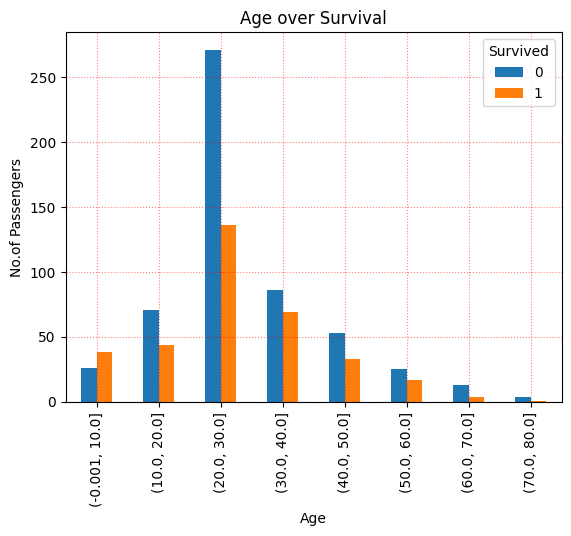

In [97]:
age_groups = pd.cut(titn['Age'], bins=range(0, 100, 10), include_lowest=True)
pd.crosstab(age_groups,titn.Survived).plot(kind='bar')
plt.ylabel('No.of Passengers')
plt.title('Age over Survival')
plt.grid(color="red", linestyle=":", alpha=0.5)

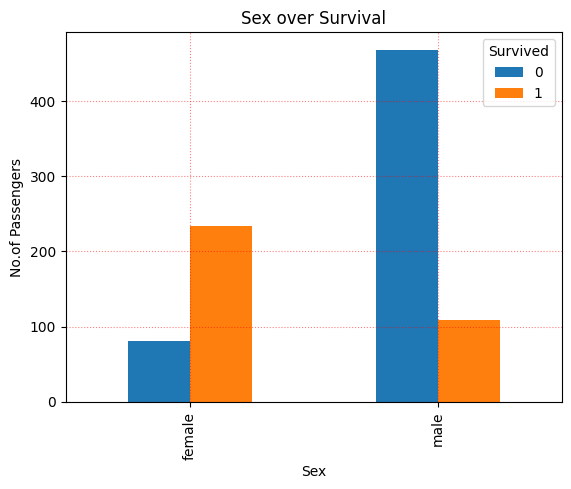

In [98]:
pd.crosstab(titn.Sex,titn.Survived).plot(kind='bar')
plt.ylabel('No.of Passengers')
plt.title('Sex over Survival')
plt.grid(color="red", linestyle=":", alpha=0.5)

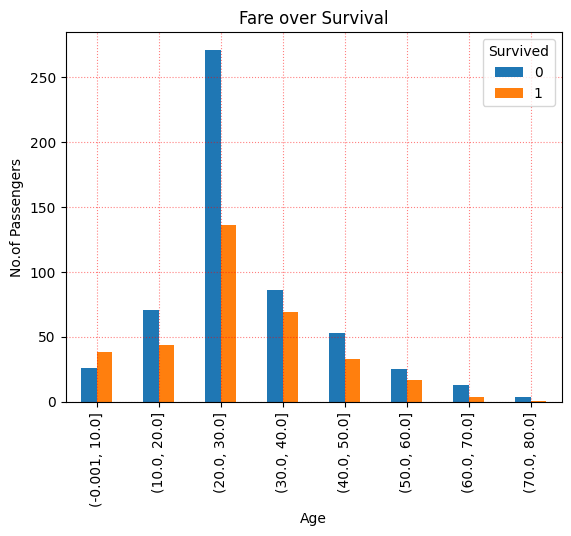

In [99]:
fare_groups = pd.cut(titn['Age'], bins=range(0, 550, 10), include_lowest=True)
pd.crosstab(fare_groups,titn.Survived).plot(kind='bar')
plt.ylabel('No.of Passengers')
plt.title('Fare over Survival')
plt.grid(color="red", linestyle=":", alpha=0.5)

**Preprocessing 2 : Converting Sex into Binary**

In [100]:
from sklearn.preprocessing import LabelEncoder
obj=LabelEncoder()
inputs['Sex']=obj.fit_transform(inputs['Sex'])
inputs.head(4)

C:\Users\Nasir\AppData\Local\Temp\ipykernel_3132\3817471325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs['Sex']=obj.fit_transform(inputs['Sex'])


,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000


****<span style="color:red">Decision Tree</span>****

In [101]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs,target, test_size=0.3)

In [103]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [104]:
model.score(x_test,y_test)

0.8470149253731343

To Predict Your Survival You can use. Pclass=[1 or 2 or 3] Sex=[male=1,female=0], Age=[Your_Age], Fare[0-512]

Let Check My Survival Probability

In [105]:
model.predict([[2,1,22,100]])

C:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

*OH. I am dead*

In [107]:
model.predict_proba([[2,1,22,100]])

C:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.87213115, 0.12786885]])

**My survival probability is 13% and death is 87%, may vary if you run due to train_test_split**

<span style="color:red">To check your just replace the input below with your info.</span>

To Predict Your Survival You can use. Pclass=[1 or 2 or 3] Sex=[male=1,female=0], Age=[Your_Age], Fare[0-512]

model.predict([[Pclass,Sex,Age,Fare]])